In [1]:
!git clone https://github.com/mattans/AgeProgression.git

Cloning into 'AgeProgression'...
remote: Enumerating objects: 24368, done.
remote: Total 24368 (delta 0), reused 0 (delta 0), pack-reused 24368
Receiving objects: 100% (24368/24368), 365.94 MiB | 15.38 MiB/s, done.
Resolving deltas: 100% (614/614), done.
Updating files: 100% (47449/47449), done.


In [2]:
import sys
sys.path.append("/content/AgeProgression")

In [5]:
import os
import glob
import random
import shutil
from tempfile import gettempdir
from IPython.display import clear_output, Image
from torchvision.datasets.folder import pil_loader
''' 
there is an error in the utils file ModuleNotFoundError: No module named 'sklearn.metrics.regression'
just remove the '.regression' from the utils file
'''
from model import Net
from utils import pil_to_model_tensor_transform
import consts

# UTKFace constants

MALE = 0
FEMALE = 1

WHITE = 0
BLACK = 1
ASIAN = 2
INDIAN = 3
OTHER = 4

# User constants

# dset_path = os.path.join('/content', '/content/tempo/')
# tempdir = gettempdir()

In [ ]:
# dset_path

'/content/tempo/'

In [6]:
consts.NUM_Z_CHANNELS = 100  # we have two trained models, with 50 and 100
net = Net()
load_path = {50: r".\trained_models\2018_09_08\01_44\epoch76", 100: r"/content/AgeProgression/trained_models/100_Z_channels_200th_epoch"}[consts.NUM_Z_CHANNELS]
net.load(load_path, slim=True)  # slim tells the net to load only the encoder and generator

/usr/local/lib/python3.8/dist-packages/torch/serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.8/dist-packages/torch/serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.8/dist-packages/torch/serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or

[11:00] Loaded E, G from /content/AgeProgression/trained_models/100_Z_channels_200th_epoch


/usr/local/lib/python3.8/dist-packages/torch/serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.conv.ConvTranspose2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/jangedoo/utkface-new")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdelrhmanenait
Your Kaggle Key: ··········


100%|██████████| 331M/331M [00:16<00:00, 21.2MB/s]


In [ ]:
from tqdm import tqdm
from pathlib import Path
from PIL import Image
import numpy as np
ages=[]
# genders=[]
# races = []
imgs = []
original_img = []
files =Path('/content/utkface-new/UTKFace').glob('*')
l=0
for myFile in tqdm(files):
  if l<4000:
    img_name = str(myFile)[29:]
    age_gender_ethnicity = img_name.split('_')
    if len(age_gender_ethnicity) == 4 :
      ages.append(int(age_gender_ethnicity[0]))
      # genders.append(int(age_gender_ethnicity[1]))
      # races.append(int(age_gender_ethnicity[2]))
      img=Image.open(myFile)
      original_img.append(np.array(img))
      img = img.convert('RGB')
      img=img.resize((128,128))
      
      img=np.array(img)
      # img = (img-127.5)/127.5
      imgs.append(img.T)
  l+=1

23708it [00:06, 3388.95it/s] 


In [ ]:
imgs_ = np.array(imgs)
imgs_.shape

(4000, 3, 128, 128)

In [ ]:
for i in range(len(ages)):
  if ages[i]<=18:
    ages[i] = 0
  if ages[i]>18 and ages[i] <= 29:
    ages[i] = 1
  if ages[i]>29 and ages[i] <= 39:
    ages[i] = 2
  if ages[i]>39 and ages[i] <= 49:
    ages[i] = 3
  if ages[i]>49 and ages[i] <= 59:
    ages[i] = 4
  if ages[i]>=60:
    ages[i] = 5

ages_ = np.array(ages)
print(ages_.shape, ages_[:30])

(4000,) [3 0 5 2 0 2 2 1 0 0 0 1 1 4 1 5 4 2 1 4 4 2 1 0 0 3 1 1 2 1]


In [ ]:
testA, testB = imgs_[ages_==0][:100], imgs_[ages_==2][:100]

In [ ]:
print(testA.shape, testB.shape)

(100, 3, 128, 128) (100, 3, 128, 128)


In [ ]:
net.E.eval()

Encoder(
  (conv_layers): ModuleList(
    (e_conv_1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(2, 2))
      (1): ReLU()
    )
    (e_conv_2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2))
      (1): ReLU()
    )
    (e_conv_3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(5, 5), stride=(2, 2))
      (1): ReLU()
    )
    (e_conv_4): Sequential(
      (0): Conv2d(256, 512, kernel_size=(5, 5), stride=(2, 2))
      (1): ReLU()
    )
    (e_conv_5): Sequential(
      (0): Conv2d(512, 1024, kernel_size=(5, 5), stride=(2, 2))
      (1): ReLU()
    )
  )
  (fc_layer): Sequential(
    (e_fc_1): Linear(in_features=1024, out_features=100, bias=True)
    (tanh_1): Tanh()
  )
)

In [ ]:
testA = (testA-127.5)/127.5
testB = (testB-127.5)/127.5

In [ ]:
testA.shape

(100, 3, 128, 128)

# Testing the model on a single image

In [ ]:
kk = np.zeros((3,128,128))
#test on the 8th image
ll = testA[8].T.copy()
# the model takes the input in shape (3,128,128), the RGB layers seperated
for i in range(3):
  for m in range(128):
    for r in range(128):
      kk[i,m,r] = ll[m,r,i]
testA[8] = kk

In [ ]:
import torch
x1 = torch.tensor(testA, dtype=torch.float)

In [ ]:
pred = net.E(x1)

In [ ]:
net.G.eval()

Generator(
  (fc): Sequential(
    (0): Linear(in_features=120, out_features=16384, bias=True)
    (1): ReLU()
  )
  (deconv_layers): ModuleList(
    (g_deconv_1): Sequential(
      (0): ConvTranspose2d(1024, 512, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
      (1): ReLU()
    )
    (g_deconv_2): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
      (1): ReLU()
    )
    (g_deconv_3): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
      (1): ReLU()
    )
    (g_deconv_4): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
      (1): ReLU()
    )
    (g_deconv_5): Sequential(
      (0): ConvTranspose2d(64, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
      (1): ReLU()
    )
    (g_deconv_6): Sequential(
 

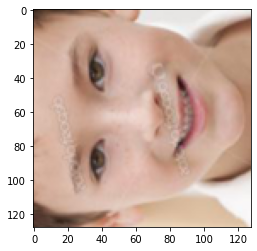

In [ ]:
plt.imshow((x1[8].T+1)/2)

In [ ]:
batch = x1[3].repeat(consts.NUM_AGES, 1, 1, 1)  # N x D x H x W
z = net.E(batch)  # N x Z
gender_tensor = -torch.ones(consts.NUM_GENDERS)
gender_tensor[int(0)] *= -1
gender_tensor = gender_tensor.repeat(consts.NUM_AGES, consts.NUM_AGES // consts.NUM_GENDERS)  # apply gender on all images
age_tensor = -torch.ones(consts.NUM_AGES, consts.NUM_AGES)
for i in range(consts.NUM_AGES):
    age_tensor[i][i] *= -1  # apply the i'th age group on the i'th image
l = torch.cat((age_tensor, gender_tensor), 1)
z_l = torch.cat((z, l), 1)

hello world
hello world
hello world


In [ ]:
pred_imgs = net.G(z_l)

In [ ]:
np_imgs = pred_imgs.detach().numpy()
np_imgs.shape

(10, 3, 128, 128)

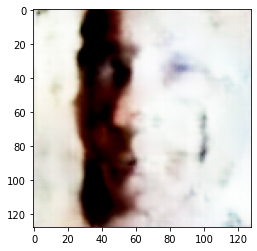

In [ ]:
from matplotlib import pyplot as plt
kk = np.zeros((128,128,3))
ll = np_imgs[9].copy()

for i in range(3):
  for m in range(128):
    for r in range(128):
      kk[m,r,i] = ll[i,m,r]
plt.imshow(kk)